In [1]:
import pandas as pd


csv_file_path = 'sampling_runtime.csv'

In [2]:
df =  pd.read_csv(csv_file_path)
df.head()

,k,time_random,time_gm_no_mem,time_gm
0,3,3814.26,3623.12,3867.13
1,4,3834.82,3595.81,3865.38
2,5,3797.33,3613.03,3864.87
3,6,3826.33,3640.37,3857.54
4,7,3844.76,3601.76,3856.00


In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Selecting columns for the bar plot
columns_of_interest = ["k", "time_random", "time_gm"]

# rename time_random to random
df = df.rename(columns={"time_random": "Random"})

# rename time_gm to GreedyMini+
df = df.rename(columns={"time_gm": "GreedyMini+"})

renamed_columns = ["k", "Random", "GreedyMini+"]

# make all values devided by 1000 on Random and GreedyMini+ columns
df["Random"] = df["Random"] / 1000
df["GreedyMini+"] = df["GreedyMini+"] / 1000

In [4]:
# set 'k' as the index
df.set_index('k', inplace=True)




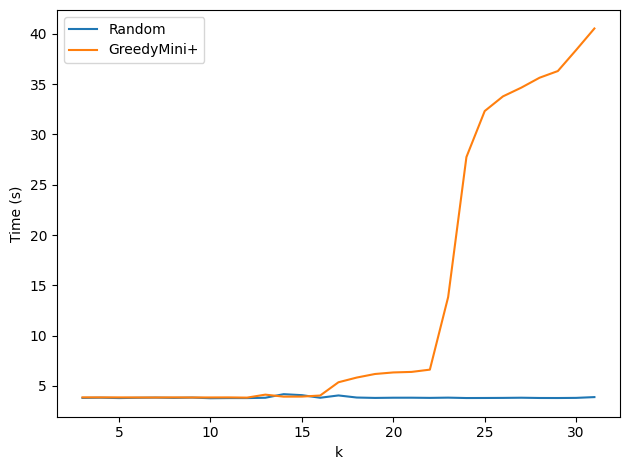

In [7]:
# plot the data as curves
df[renamed_columns[1:]].plot(kind='line')
plt.ylabel('Time (s)')
plt.xlabel('k')

plt.tight_layout()
plt.savefig('sampling_runtime.pdf')
plt.show()